In [1]:
#do this later from admin: !python -m pip install --upgrade pip


# TOC

0. [Imports](#first-bullet)
1. [EDA](#1.0-bullet)
2. [Feature Engineering](#2.0-bullet)  
 2.1 [Pt 1 - Regression](#2.1-bullet)  
 2.2 [Pt 2 - Classification](#2.2-bullet)
3. [Basic Model](#3.0-bullet)  
 3.1 [Pt 1 - Regression](#3.1-bullet)  
 3.2 [Pt 2 - Classification](#3.2-bullet)
4. [Reference and Planning](#4.0-bullet)

Date Time
* General: publishedAt
* Friday (is_friday)
* Is weekend (is_weekend)
* week number (week)
* Month day (month_day)
* Month (month)
* 2 digit year number (year)

* Ignoring overall day count - possible overfit to search algorithm

Description
* Sentiment (description_sentiment)
* Overall word count (description_wordcount)
* CVEC (./data/engineered_data/description_wordvec.csv)


Tags
* Sentiment (tags_sentiment)
* Num tags (tags_wordcount)
* CVEC (./data/engineered_data/tag_wordvec.csv)

Title
* Sentiment (title_sentiment)
* Word count (title_wordcount)
* feat / ft. (title_featuring)
* Letter Count (intitle_ + a,b,c,...)
* String length (title_length)
* Which letters
* Length  
* CVEC (./data/engineered_data/title_wordvec.csv)

Ratios
* likes / views (lv_ratio)
* comments / view (comment_view_ratio)
* likes / dislikes (like_dislike_ratio)

Measures (includes log)
  * commentCount
  * dislikeCount 
  * favoriteCount 
  * likeCount: 
  * viewCount: view_log

Other
* Has content rating restriction (contentRating)
* Has any region Restriction (regionRestriction)
* Has captioned text (caption)
* Content has approved license (licensedContent)
* Duration of video (duration)
* High definition 1 or std (0) (definition)


In [143]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
import requests
import json

#Youtube Data API Packages: 
"""from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from googleapiclient.discovery import build
import argparse
from googleapiclient.errors import HttpError"""

#Modeling
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
#from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.cluster import KMeans
from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
"""from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import PorterStemmer"""

#Time analysis
import time
import datetime
"""from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf"""

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('classic')
sns.set_style('whitegrid')

In [101]:
df_description = pd.read_csv('./data/engineered_data/description_wordvec.csv')
df_tag = pd.read_csv('./data/engineered_data/tag_wordvec.csv')
df_title = pd.read_csv('./data/engineered_data/title_wordvec.csv')
# df_main = pd.read_csv('./data/engineered_data/data_engineered_10.9_2019.csv')

In [102]:
# df_description = df_description.join(df_main.loc[:, ['view_log', 'vidId']].set_index('vidId'), on=df_description['vidId'])
# df_tag = df_tag.join(df_main.loc[:, ['view_log', 'vidId']].set_index('vidId'), on=df_tag['vidId'])
# df_title = df_title.join(df_main.loc[:, ['view_log', 'vidId']].set_index('vidId'), on=df_title['vidId'])

# df_tag.to_csv('./data/engineered_data/tag_wordvec.csv', index=False)
# df_title.to_csv('./data/engineered_data/title_wordvec.csv', index=False)

# <a class="anchor" id="3.0-bullet"> 3. Basic Model</a>

In [127]:
df_combined = df_description.join(df_tag.set_index('vidId'), on=df_description['vidId'], how='left', rsuffix='tag')
df_combined = df_combined.join(df_title.set_index('vidId'), on=df_combined['vidId'], how='left', rsuffix='title')

In [128]:
cols_exclude = [col for col in df_combined.columns if '_word_' not in str(col)]
cols_include_initial = [col for col in df_combined.columns if col not in cols_exclude]

#'lv_ratio','comment_view_ratio' take this between .85 and .9
df_formodel = df_combined[df_combined.view_log>1]
#df_formodel = df_formodel[df_formodel['view_class']>1]

In [131]:
y = df_formodel.view_log
X = df_formodel.loc[:, cols_include_initial]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## <a class="anchor" id="3.1-bullet">3.1 Gradient Boost</a>



In [132]:
gb = GradientBoostingRegressor(max_depth= 3, n_estimators=180, subsample=0.9, random_state=48) #GridSearch Params
gb.fit(X_train_sc, y_train)
gb.score(X_test_sc, y_test)
#print('   ', i, model.score(X_test_sc, y_test))

0.2840793586878959

In [68]:
outliers = list(df_residuals.sort_values(by='residuals').iloc[:7, :].index)
temp = df_main
outliers_df = df_residuals.sort_values(by='residuals').iloc[:7, :].loc[:, ['predicted', 'residuals']]
temp.join(outliers_df, how='right').loc[:, ['title', 'view_log', 'predicted']]

,title,view_log,predicted
4280,Chet Baker - I'm a Fool to Want You,6.109215,3.606346
8361,Biper y sus amigos - La Hormiguita Hippie,7.966892,5.569955
5166,Sinéad O'Connor & The Chieftains - The Foggy Dew,7.033382,4.815286
3134,【公式】H△G「アロー」Music Video（メジャー1st.アルバム「青色フィルム」収録）,5.073524,3.145828
1759,L'elefante e la farfalla - Michele Zarrillo,6.887009,5.006149
8017,Blessed Be Your Name (worship video w/ lyrics),7.204681,5.780034
8274,OT 2018 - Natalia y Marta espían a Alba Reche ...,4.027390,2.751516


## <a class="anchor" id="3.2-bullet">3.2 Neural Net</a>



In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [133]:
nn = Sequential()
#this does input and first activation
nn.add(Dense(X_train_sc.shape[1], activation='relu', input_dim=X_train_sc.shape[1]))
nn.add(Dropout(.8))
# nn.add(Dense(X_train_sc.shape[1], activation='relu'))
# nn.add(Dropout(.8))
# nn.add(Dense(int(X_train_sc.shape[1]/2), activation='relu'))
# nn.add(Dropout(.8))
# nn.add(Dense(int(X_train_sc.shape[1]/4), activation='relu'))
nn.add(Dense(1, activation=None))
nn.compile(loss='mean_squared_error', optimizer='adam')
history = nn.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=50, verbose=0)
preds = nn.predict(X_test_sc)
print( '    score: ', r2_score(y_test, preds))

    score:  0.08191964478001246


In [77]:
mean_squared_error(y_test, nn.predict(X_test_sc))

2.7129606531777775

In [78]:
mean_squared_error(y_test, gb.predict(X_test_sc))

1.9743596791089197

In [81]:
df_description.view_log.mean()

6.1887429678927495

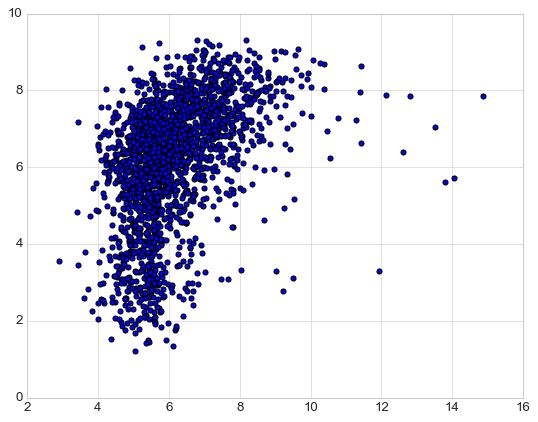

In [137]:
plt.scatter(nn.predict(X_test_sc), y_test)

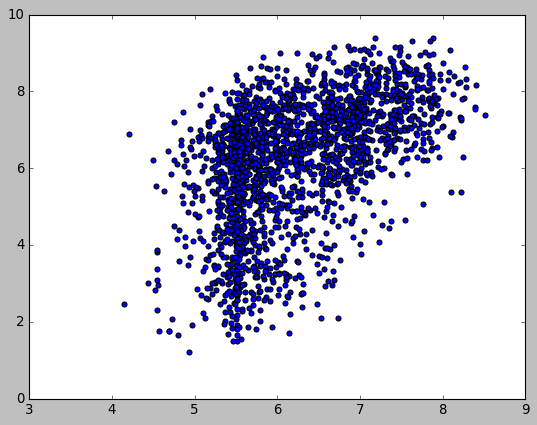

In [79]:
plt.scatter(gb.predict(X_test_sc), y_test)

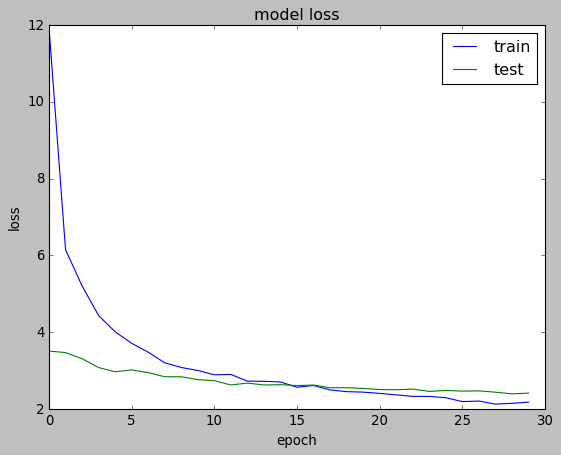

In [134]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show();

In [138]:
lr = Ridge(100)
lr.fit(X_train_sc, y_train.values)
lr.score(X_test_sc, y_test)

0.1733212382683078

## <a class="anchor" id="3.3-bullet">3.3 Random Forrest</a>


In [140]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_sc, y_train)
rf.score(X_test_sc, y_test)

0.2488636223649483

In [44]:
paramz = {
    'max_features': [.4, .5, .7],
    'n_estimators': [90, 100, 150]
    
}
gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=paramz)
gs.fit(X_train_sc, y_train)
gs.score(X_test_sc, y_test)

0.29175233145227386

In [45]:
gs.best_params_

{'max_features': 0.4, 'n_estimators': 150}

## <a class="anchor" id="3.4-bullet">3.4 Bagger</a>


In [61]:
from sklearn.ensemble import BaggingRegressor

In [141]:
br = BaggingRegressor(RandomForestRegressor())

In [142]:
br.fit(X_train_sc, y_train)
br.score(X_test_sc, y_test)

0.2953241217917377

## <a class="anchor" id="3.4-bullet">3.4 Linear Regression</a>


In [159]:
lr = Ridge()
lr.fit(X_train_sc, y_train)
lr.score(X_test_sc, y_test)

0.16217546447542852

## <a class="anchor" id="3.6-bullet">3.7 Comparison</a>


In [135]:
df_big = df_main[df_main.viewCount > 800000000]
df_big_ss = ss.transform(df_big.loc[:, cols_include_initial])
df_big['GradientBoost'] = 10**gb.predict(df_big_ss)
df_big['NeuralNet'] = 10**nn.predict(df_big_ss)
df_big['RandomForest'] = 10**rf.predict(df_big_ss)
df_big['Bagger'] = 10**br.predict(df_big_ss)
df_big['GSForest'] = 10**gs.predict(df_big_ss)
#df_big.viewCount = df_big.viewCount.map(lambda x: '{:.6g}'.format(x))
df_big.loc[:, ['title', 'viewCount', 'RandomForest', 'GSForest','GradientBoost', 'NeuralNet', 'Bagger',]].sort_values(by='viewCount', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,title,viewCount,RandomForest,GSForest,GradientBoost,NeuralNet,Bagger
7479,Luis Fonsi - Despacito ft. Daddy Yankee,5555912002,4.820574e+09,1.984357e+09,7.136080e+08,59515628.0,9.541236e+08
4268,Ed Sheeran - Shape of You [Official Video],3827104659,2.395282e+09,1.955760e+09,6.634234e+08,24949882.0,6.845203e+08
7190,Wiz Khalifa - See You Again ft. Charlie Puth [...,3788737518,1.485443e+09,1.730075e+09,7.003975e+08,109122968.0,1.430299e+09
5540,Mark Ronson - Uptown Funk ft. Bruno Mars,3256917992,1.992513e+09,1.799341e+09,8.894255e+08,18852572.0,1.436450e+09
3634,PSY - GANGNAM STYLE(강남스타일) M/V,3218413082,1.994684e+09,1.608164e+09,7.752780e+08,54361564.0,1.495922e+09
569,Justin Bieber - Sorry (PURPOSE : The Movement),3014897224,8.853127e+08,7.562548e+08,8.275975e+08,23558290.0,6.589571e+08
7417,Maroon 5 - Sugar,2756205542,4.231355e+08,2.741807e+08,3.304045e+08,19781226.0,4.143682e+08
7514,Taylor Swift - Shake It Off,2650920924,1.314071e+09,1.773477e+09,6.357257e+08,34396276.0,1.483781e+09
5506,Katy Perry - Roar (Official),2638406673,2.054632e+09,1.681180e+09,1.046308e+09,61742212.0,1.355184e+09
627,Enrique Iglesias - Bailando (Español) ft. Desc...,2582945265,4.048148e+08,4.225627e+08,4.178253e+08,21149760.0,3.528018e+08


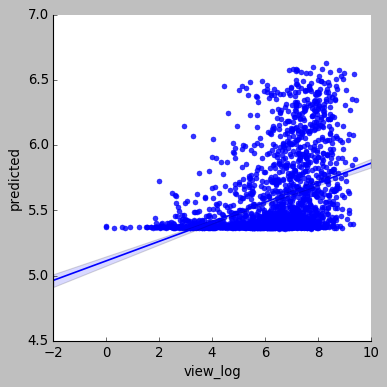

In [71]:
df_residuals = pd.DataFrame(y_test)
df_residuals['predicted'] = preds
df_residuals['residuals'] = df_residuals.predicted - df_residuals.view_log 
sns.lmplot('view_log', 'predicted', data=df_residuals)

# <a class="anchor" id="4.0-bullet">4.0 Back Testing</a>

In [160]:
df_small = df_main[pd.to_datetime(df_main.publishedAt)>datetime.datetime(2018, 9, 1)]
df_small_ss = ss.transform(df_small.loc[:, cols_include_initial])
df_small['GradientBoost'] = 10**gb.predict(df_small_ss)
df_small['NeuralNet'] = 10**nn.predict(df_small_ss)
df_small['RandomForest'] = 10**rf.predict(df_small_ss)
df_small['Bagger'] = 10**br.predict(df_small_ss)
df_small['GSForest'] = 10**gs.predict(df_small_ss)
df_small = df_small.loc[:, ['vidId', 'title', 'viewCount', 'RandomForest', 'GSForest','GradientBoost', 'NeuralNet', 'Bagger',]].sort_values(by='RandomForest', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipy

In [163]:
df_small.min()

vidId                                                  --BHuKeveg4
title            "Kalatapaswi" K.Viswanath ♬♬ Classical Hit Son...
viewCount                                                        0
RandomForest                                               168.098
GSForest                                                   210.923
GradientBoost                                              71.4145
NeuralNet                                                  1256.25
Bagger                                                     239.897
dtype: object

In [164]:
df_small.sort_values(by='RandomForest')

,vidId,title,viewCount,RandomForest,GSForest,GradientBoost,NeuralNet,Bagger
3880,6FQdE__eSz0,Обзор Укулеле баритон Flight NUB 310 l SKIFMUS...,131,1.680975e+02,2.109225e+02,2.724700e+02,2.194402e+03,2.955647e+02
2862,t7VQ38-FO30,Aiden H - Café con sal ft. Jackpot77,110,1.703862e+02,5.311342e+02,3.102748e+03,4.348906e+03,1.018833e+03
6306,0kVe9KlKzMA,R Mvmnt (Remix),16,1.747691e+02,1.021711e+03,7.141446e+01,2.575702e+03,7.307040e+02
1953,tI50c9qbQE4,MUSIK F'DJ RINDY RBS TERBARU | Lagu DJ Terbaru...,200,1.998832e+02,2.647951e+02,2.137855e+02,1.834739e+03,2.845841e+02
6352,B8sBDtbEsAw,અર્જુન આર મેડા નું રિમિક્સ બેવફા ગીત/ARJUN R M...,137,2.150432e+02,2.309993e+02,4.024354e+02,3.443476e+03,3.359024e+02
751,D8zJeVjsPtA,Jonathan C. Meier - Savage (Audio),112,2.164792e+02,2.241920e+02,1.935857e+02,1.822619e+03,2.398974e+02
6482,nchPngYVDQA,M.A.S.O - FARE SOLDI (Feat. R.ZETA),195,2.193200e+02,3.160910e+02,6.376327e+02,3.058335e+03,3.810833e+02
1883,k-qTdDVn3Wc,"Vetro F - ""Pseudo"" [Prod. Mr Smallcap]",230,2.221214e+02,3.646647e+02,7.070710e+02,2.365729e+03,5.475099e+02
1871,Qz-hHU1zacw,1. OTR x F.DECIDE - INTRO (Prod. 27Corazones),93,2.236450e+02,4.770289e+02,3.540174e+02,2.004044e+03,4.376089e+02
6279,jXT1323vYl4,Down Low (Nobody Has to Know) - R. Kelly,9,2.301088e+02,7.172017e+02,1.519095e+02,1.688808e+03,5.686268e+02


# Inference

In [164]:
gb_feat_importance = pd.DataFrame(gb.feature_importances_, index=list(X_train.columns), columns=['importance']).sort_values(by='importance', ascending=False)

gb_feat_importance['title_importance'] = gb_feat_importance.index.map(lambda x: x.replace('title_word_', '') if 'title_word' in x else 'xxNonexx')

gb_feat_importance['description_importance'] = gb_feat_importance.index.map(lambda x: x.replace('descr_word_', '') if 'descr_word' in x else 'xxNonexx')

gb_feat_importance['tag_importance'] = gb_feat_importance.index.map(lambda x: x.replace('tags_word_', '') if 'tags_word' in x else 'xxNonexx')

gb_feat_importance

,importance,title_importance,description_importance,tag_importance
descr_word_do,0.016257,xxNonexx,do,xxNonexx
descr_word_2018,0.016065,xxNonexx,2018,xxNonexx
descr_word_itun,0.014702,xxNonexx,itun,xxNonexx
descr_word_re,0.013553,xxNonexx,re,xxNonexx
title_word_ft,0.013300,ft,xxNonexx,xxNonexx
tags_word_video,0.012452,xxNonexx,xxNonexx,video
descr_word_perform,0.012395,xxNonexx,perform,xxNonexx
tags_word_trap,0.011875,xxNonexx,xxNonexx,trap
descr_word_here,0.011455,xxNonexx,here,xxNonexx
tags_word_latin,0.010948,xxNonexx,xxNonexx,latin


In [166]:
lr_importance = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['lr_coef'])

In [169]:
lr_importance.loc['descr_word_do'][0]

0.02085835308286521

In [171]:
gb_feat_importance['lr_coef'] = gb_feat_importance.index.map(lambda x: lr_importance.loc[x][0] )

In [181]:
gb_feat_importance[gb_feat_importance['description_importance']!='xxNonexx'].sort_values(by='lr_coef')

,importance,title_importance,description_importance,tag_importance,lr_coef
descr_word_2018,0.016065,xxNonexx,2018,xxNonexx,-0.302090
descr_word_yo,0.000000,xxNonexx,yo,xxNonexx,-0.251766
descr_word_the,0.002660,xxNonexx,the,xxNonexx,-0.225364
descr_word_re,0.013553,xxNonexx,re,xxNonexx,-0.191084
descr_word_at,0.009544,xxNonexx,at,xxNonexx,-0.129366
descr_word_veri,0.000000,xxNonexx,veri,xxNonexx,-0.127318
descr_word_tune,0.000907,xxNonexx,tune,xxNonexx,-0.105081
descr_word_on,0.000780,xxNonexx,on,xxNonexx,-0.096145
descr_word_where,0.000787,xxNonexx,where,xxNonexx,-0.090375
descr_word_we,0.001857,xxNonexx,we,xxNonexx,-0.076961


In [178]:
gb_feat_importance[].sort_values(by='title_importance', ascending=False)

,importance,title_importance,description_importance,tag_importance,lr_coef
title_word_you,0.002649,you,xxNonexx,xxNonexx,0.041077
descr_word_do,0.016257,xxNonexx,do,xxNonexx,0.020858
descr_word_mix,0.000456,xxNonexx,mix,xxNonexx,-0.013694
descr_word_facebook,0.000185,xxNonexx,facebook,xxNonexx,-0.025753
tags_word_vevo,0.000288,xxNonexx,xxNonexx,vevo,0.071395
descr_word_name,0.000295,xxNonexx,name,xxNonexx,0.034981
descr_word_dj,0.000327,xxNonexx,dj,xxNonexx,0.036627
descr_word_product,0.000385,xxNonexx,product,xxNonexx,-0.061125
descr_word_right,0.000386,xxNonexx,right,xxNonexx,-0.002047
tags_word_black,0.000393,xxNonexx,xxNonexx,black,0.012760
